In [1]:
import pandas as pd
import json
from os import listdir
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'text.usetex' : True})
sns.set_style("white")

## Load Data + Create Pivots

In [2]:
adult = (pd.read_csv('compasEqOp2.csv')
         .drop('Unnamed: 0', axis = 1)
         .assign(eqOp=lambda df: df.eqOpTrue*0.67+df.eqOpFalse*.33,
                eqOpTrain=lambda df: df.eqOpTrue_train*0.67+df.eqOpFalse_train*.33))

dataset = "compas"
results_path ='compas_eqop2/'

color_1 = "#329932"
color_2 = "#ff6961"
color_3 = "#2c7fb8"

In [3]:
adult.columns

Index(['accuracy', 'accuracy_std', 'accuracy_train', 'complexity',
       'complexity_final', 'epsilon', 'eqOpTrue_train', 'eqOpFalse_train',
       'accTrue_train', 'accFalse_train', 'eqOpTrue', 'eqOpFalse',
       'epsOpTrue_std', 'epsOpFalse_std', 'eps_test_std', 'accTrue',
       'accFalse', 'ip', 'eps_test', 'acc_diff', 'eps_train', 'acc_diff_train',
       'eqOp', 'eqOpTrain'],
      dtype='object')

In [4]:
adult.iloc[np.argmin(adult['eps_test']),:]

accuracy               0.529555
accuracy_std           0.016289
accuracy_train         0.529557
complexity            10.000000
complexity_final       0.000000
epsilon                0.000000
eqOpTrue_train         0.000000
eqOpFalse_train        0.000000
accTrue_train          0.609126
accFalse_train         0.476855
eqOpTrue               0.000000
eqOpFalse              0.000000
epsOpTrue_std          0.000000
epsOpFalse_std         0.000000
eps_test_std           0.000000
accTrue                0.608829
accFalse               0.477281
ip                  2234.700000
eps_test               0.000000
acc_diff               0.131548
eps_train              0.000000
acc_diff_train         0.132271
eqOp                   0.000000
eqOpTrain              0.000000
Name: 16, dtype: float64

In [5]:
adult_eps = (adult[(adult.epsilon <= 0.5)]
           .sort_values(by='epsilon', ascending=True)
           .groupby(['epsilon'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax(),
             eqOpTrue =lambda df: 1 - df.eqOpTrue,
             eqOpFalse =lambda df: 1- df.eqOpFalse,
             eqOpTrain =lambda df: 1 - df.eqOpTrain,
             eqOp =lambda df: 1 - df.eqOp,
             eqOpTrue_train =lambda df: 1 - df.eqOpTrue_train,
             eqOpFalse_train =lambda df: 1 - df.eqOpFalse_train
            ))

adult_compl = (adult[adult.epsilon > 0]
           .sort_values(by='complexity', ascending=True)
           .groupby(['complexity'])
           .agg({"ip": np.min,
                 "eps_test": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOp": np.min,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrain": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax(),
             eqOpTrue =lambda df: 1 - df.eqOpTrue,
             eqOpFalse = lambda df:1- df.eqOpFalse,
             eqOpTrain = lambda df:1 - df.eqOpTrain,
             eqOp =lambda df: 1 - df.eqOp,
             eqOpTrue_train = lambda df:1 - df.eqOpTrue_train,
             eqOpFalse_train = lambda df: 1 - df.eqOpFalse_train))

adult_eps_test = (adult
           .sort_values(by='eps_test', ascending=True)
           .groupby(['eps_test'])
           .agg({"ip": np.min,
                 "eps_train": np.min,
                 "acc_diff": np.min,
                 "accuracy": np.max,
                "accuracy_train": np.max,
                "accTrue_train": np.max,
                "accFalse_train": np.max,
                "eqOpTrue": np.min,
                "eqOpFalse": np.min,
                "eqOpTrue_train": np.min,
                "eqOpFalse_train": np.min,
                "accTrue": np.max,
                "accFalse": np.max})
           .reset_index()
           .assign(cumAcc=lambda df: df.accuracy.cummax(),
             eqOpTrue =lambda df: 1 - df.eqOpTrue,
             eqOpFalse =lambda df: 1- df.eqOpFalse,
             eqOpTrue_train =lambda df: 1 - df.eqOpTrue_train,
             eqOpFalse_train =lambda df: 1 - df.eqOpFalse_train))

## Fairness Story

In [6]:
#wide = adult_eps[['epsilon', 'eqOpTrue_train', 'eqOpTrue']].set_index('epsilon')
#sns.lineplot(wide)

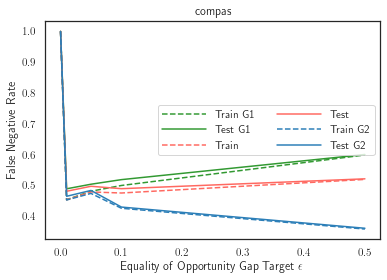

In [7]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrain', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOp', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('False Negative Rate')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_eqOpCurve.pdf',dpi=300)

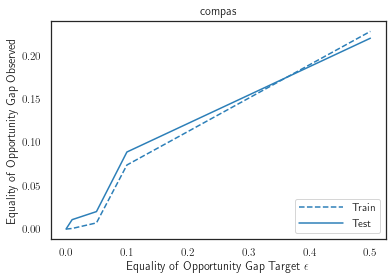

In [8]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")
ax.lines[1].set_color(color_3)
ax.legend(frameon=True, loc='lower right', handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Equality of Opportunity Gap Observed')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_eqOpGap.pdf',dpi=300)

In [9]:
adult_eps[adult_eps.epsilon == adult_eps.epsilon.min()]

,epsilon,ip,eps_test,eps_train,acc_diff,accuracy,accuracy_train,accTrue_train,accFalse_train,eqOp,eqOpTrue,eqOpFalse,eqOpTrain,eqOpTrue_train,eqOpFalse_train,accTrue,accFalse,cumAcc
0,0.0,1838.8,0.0,0.0,0.052057,0.62674,0.623217,0.655862,0.601562,1.0,1.0,1.0,1.0,1.0,1.0,0.658289,0.606233,0.62674


## Accuracy Story

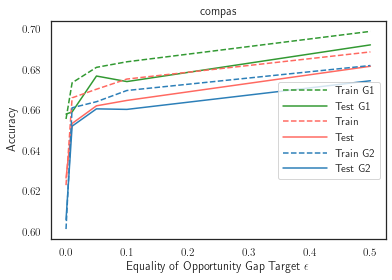

In [10]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

ax.legend(frameon=True, loc='center right', handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracy.pdf',dpi=300)

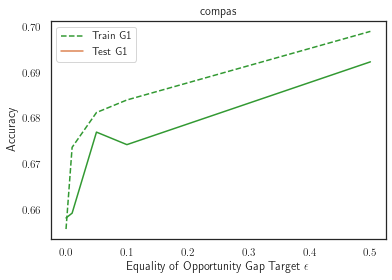

In [11]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG1.pdf',dpi=300)

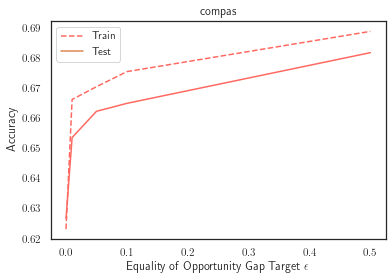

In [12]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Train")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_2)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Test")
ax.lines[1].set_color(color_2)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyOverall.pdf',dpi=300)

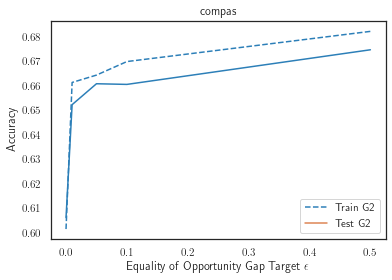

In [13]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Train G2")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_3)

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Test G2")
ax.lines[1].set_color(color_3)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Target $\epsilon$')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyG2.pdf',dpi=300)

In [14]:
adult_eps_test_1 = adult_eps_test.append(pd.DataFrame({'eps_test':[0.5], 'cumAcc': [adult_eps_test.cumAcc.max()]}))

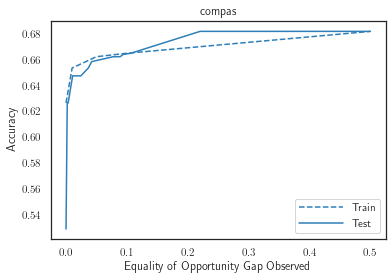

In [15]:
#add std. dev. + complete to trivial
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'cumAcc', label = 'Train')
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_3)

sns.lineplot(data=adult_eps_test_1, x='eps_test', y = 'cumAcc', label = 'Test')
ax.lines[1].set_color(color_3)
ax.legend(frameon=True, loc='lower right', handlelength=4)

sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Observed')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyFairTradeOff.pdf',dpi=300)

## Complexity Story

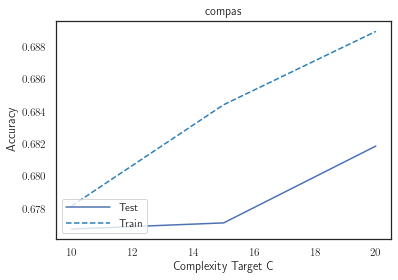

In [16]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')
ax.lines[1].set_linestyle("--")
ax.lines[1].set_color(color_3)
ax.legend(frameon=True, loc='lower left', handlelength=4)


sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_accuracyComplexity.pdf',dpi=300)

Text(0.5, 1.0, 'compas')

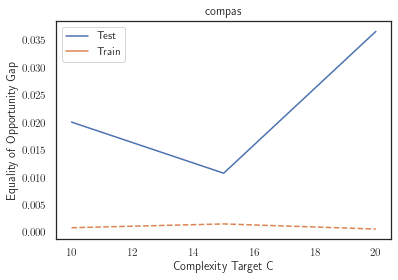

In [17]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eps_test', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eps_train', label= 'Train')
ax.lines[1].set_linestyle("--")

sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('Equality of Opportunity Gap')
sns.mpl.pyplot.title(dataset)


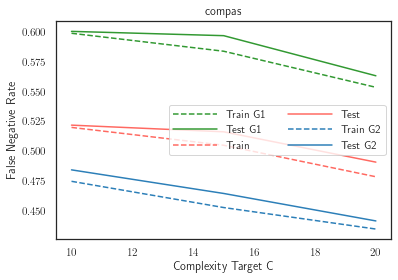

In [18]:
#Good chart
#Throw in population
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrain', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOp', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

ax.legend(frameon=True, loc='center right',ncol=2,handlelength=4)

sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('False Negative Rate')
sns.mpl.pyplot.title(dataset)

plt.savefig(results_path+dataset+'_eqOpComplexity.pdf',dpi=300)

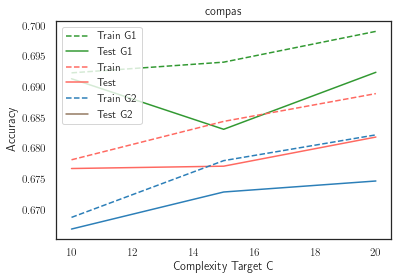

In [19]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label = "Train G1")
ax.lines[0].set_linestyle("--")
ax.lines[0].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label = "Test G1")
ax.lines[1].set_color(color_1)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label = "Train")
ax.lines[2].set_linestyle("--")
ax.lines[2].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label = "Test")
ax.lines[3].set_color(color_2)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label = "Train G2")
ax.lines[4].set_linestyle("--")
ax.lines[4].set_color(color_3)

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label = "Test G2")
ax.lines[5].set_color(color_3)

sns.mpl.pyplot.xlabel('Complexity Target C')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_complexityGroupAccuracy.pdf',dpi=300)

## Comparison Story

In [20]:
benchmarks = (pd.read_csv('benchmark_compas.csv')
              .drop('Unnamed: 0', axis=1)
             .append(pd.DataFrame({'algo':['logreg','logreg','logreg','cart','cart'], 
                                   'cumAcc':[0.53,0.53,0.68,0.53,0.53], 
                                   'EqOfOp':[0,0.27,0.274,0,0.213]})))

adult_eps_test_full =adult_eps_test.append(pd.DataFrame({'eps_test':[0.274], 
                                   'cumAcc':[0.682]}))

In [21]:
adult_eps_test['cumAcc'].max()

0.6818832298315219

In [22]:
adult_eps_test

,eps_test,ip,eps_train,acc_diff,accuracy,accuracy_train,accTrue_train,accFalse_train,eqOpTrue,eqOpFalse,eqOpTrue_train,eqOpFalse_train,accTrue,accFalse,cumAcc
0,0.000000,2234.7,0.000000e+00,0.131548,0.529555,0.529557,0.609126,0.476855,1.000000,1.000000,1.000000,1.000000,0.608829,0.477281,0.529555
1,0.002013,1838.8,8.960426e-08,0.052057,0.626740,0.623217,0.655862,0.601562,0.618199,0.620212,0.624402,0.624402,0.658289,0.606233,0.626740
2,0.003480,2103.0,0.000000e+00,0.111439,0.560447,0.557934,0.623664,0.514441,0.880119,0.883599,0.888315,0.888315,0.627463,0.516024,0.626740
3,0.010833,1636.1,1.587862e-03,0.019326,0.647591,0.659804,0.667158,0.654942,0.475422,0.464588,0.448334,0.446746,0.659337,0.640011,0.647591
4,0.020145,1675.2,7.096339e-03,0.030354,0.646646,0.654078,0.670289,0.643311,0.504596,0.484451,0.481909,0.474812,0.665114,0.634761,0.647591
5,0.024326,1710.0,8.926181e-04,0.005173,0.638878,0.650836,0.661185,0.643997,0.489816,0.465490,0.454435,0.453542,0.635745,0.640917,0.647591
6,0.036677,1599.2,6.545055e-04,0.003069,0.653653,0.666309,0.673735,0.661393,0.478149,0.441472,0.435297,0.434643,0.655395,0.652326,0.653653
7,0.042156,1606.8,2.842046e-02,0.030565,0.658579,0.663698,0.681344,0.651995,0.491486,0.449330,0.481155,0.452734,0.677060,0.646496,0.658579
8,0.077682,1573.8,4.409894e-02,0.003651,0.662369,0.670561,0.679864,0.664395,0.475157,0.397476,0.440995,0.396896,0.664517,0.660866,0.662369
9,0.088887,1620.5,7.388022e-02,0.018784,0.657252,0.659214,0.671519,0.651025,0.519461,0.430573,0.500521,0.426641,0.668745,0.649960,0.662369


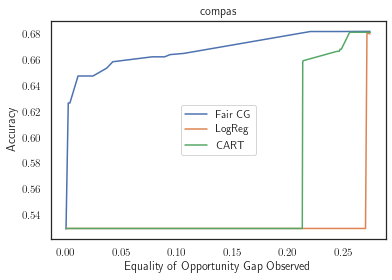

In [23]:
#add std. dev. + complete to trivial

sns.lineplot(data=adult_eps_test_full, x='eps_test', y = 'cumAcc', label = 'Fair CG')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')
sns.mpl.pyplot.xlabel('Equality of Opportunity Gap Observed')
sns.mpl.pyplot.ylabel('Accuracy')
sns.mpl.pyplot.title(dataset)
plt.savefig(results_path+dataset+'_benchmark.pdf',dpi=300)

In [24]:
1/0

ZeroDivisionError: division by zero

# ROUGH

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')
plt.savefig("adult_EpsVAccuracy.png")

In [ ]:
#Good with raw EqOp numbers graph
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eps_test', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')
plt.savefig("adult_EpsVEqOp.png")

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy', label = "Total")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Positive Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity (%)')

In [ ]:
#Good chart
#Throw in population

ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse_train', label = "Negative Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpTrue', label = "Test Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'eqOpFalse', label = "Test Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Equality of Opportunity Trrain (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Positive Class")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue_train', label = "Train")
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accTrue', label = "Test")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_eps, x='epsilon', y = 'accFalse_train', label = "Negative Class")

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Train Accuracy (%)')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
#Good chart - tradeoff between interpret. and fairness
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse', label= 'Test - ')

ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'eqOpFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue', label= 'Test +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse', label= 'Test - ')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accTrue_train', label= 'Train +')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accFalse_train', label= 'Train -')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy', label= 'Test')
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'accuracy_train', label= 'Train')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Accuracy')

In [ ]:
ax = sns.lineplot(data=adult_compl, x='complexity', y = 'ip')

sns.mpl.pyplot.xlabel('Complexity Constraint')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_complexVloss.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'ip')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
#plt.savefig("adult_hammingVeps.png")

In [ ]:
plot = sns.lineplot(data=adult_eps, x='epsilon', y = 'accuracy_train')

sns.mpl.pyplot.xlabel('Fairness Constraint (%)')
sns.mpl.pyplot.ylabel('Hamming Loss')
plt.savefig("adult_hammingVeps.png")

In [ ]:
#add std. dev. + complete to trivial
benchmarks = pd.read_csv('benchmark_adult.csv')

sns.lineplot(data=adult_eps_test, x='eps_test', y = 'cumAcc', label = 'Us')
sns.lineplot(data=benchmarks[benchmarks.algo == 'logreg'], x='EqOfOp', y = 'cumAcc', label = 'LogReg')
sns.lineplot(data=benchmarks[benchmarks.algo == 'cart'], x='EqOfOp', y = 'cumAcc', label = 'CART')

In [ ]:
%time print('hi')